In [1]:
# Preparing a synthetic dataset
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
import pandas as pd
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_data['target'] = iris['target']
iris_data['target'] = iris_data['target'].apply(lambda x:iris['target_names'][x])

In [6]:
df = iris_data.query("target=='setosa' | target=='versicolor'")

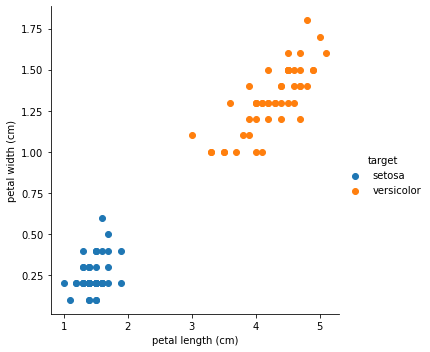

In [10]:
# Looking at the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df, hue='target', height=5).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [11]:
# Creating the model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
X = iris_data.drop(columns=['target'])
y = iris_data['target']
logistic_regression.fit(X,y)

/home/sd/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Testing the model with a synthetic row
X_test =[[5.6, 2.4, 3.8, 1.2]]
logistic_regression.predict(X_test)

/home/sd/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

(1.0, 5.380000000000004)

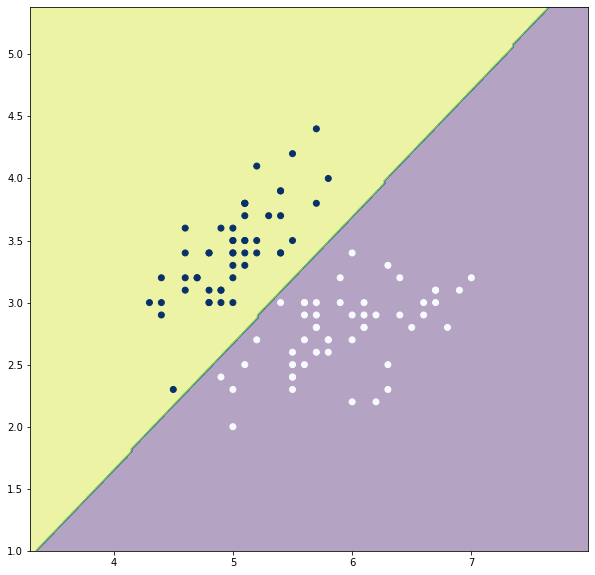

In [17]:
# Visualizing the decision boundary
import numpy as np
df = iris_data.query("target=='setosa' | target=='versicolor'")[['sepal length (cm)','sepal width (cm)','target']]
X = df.drop(columns=['target']).values
y = df['target'].values
y = [1 if x == 'setosa' else 0 for x in y]
logistic_regression.fit(X,y)
                                                                 
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.rcParams['figure.figsize']=(10,10)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Blues')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())